## Observations and Insights 

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "/Users/kristenhanold/Desktop/GaTechBootCamp/MatPlotLib/Mouse_metadata.csv"
study_results_path = "/Users/kristenhanold/Desktop/GaTechBootCamp/MatPlotLib/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [91]:
# Checking the number of mice.
mice_count = merged_data['Mouse ID'].count()
mice_count

1893

In [92]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [93]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = merged_data[merged_data.duplicated(['Mouse ID',])]
all_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [94]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged_data = merged_data.drop_duplicates('Mouse ID')
clean_merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [95]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = clean_merged_data['Mouse ID'].count()
new_mice_count

249

## Summary Statistics

In [130]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Create a group based on the values in the 'drug regimen' column
drug_regimen_stats = merged_data.groupby('Drug Regimen')
# Summary Statistics based on Tumor Volume (mm3):
drug_mean = drug_regimen_stats['Tumor Volume (mm3)'].mean().round(2)
drug_median = drug_regimen_stats['Tumor Volume (mm3)'].median().round(2)
drug_variance = drug_regimen_stats['Tumor Volume (mm3)'].var().round(2)
drug_std = drug_regimen_stats['Tumor Volume (mm3)'].std().round(2)
drug_sem = drug_regimen_stats['Tumor Volume (mm3)'].sem().round(2)

# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({
    'Mean': drug_mean,
    'Median': drug_median,
    'Variance': drug_variance,
    'Standard Deviation': drug_std,
    'SEM': drug_sem
})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [131]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# Create a group based on the values in the 'drug regimen' column
agg_drug_regimen_stats = merged_data.groupby('Drug Regimen').agg(
    agg_drug_mean = ('Tumor Volume (mm3)', np.mean),
    agg_drug_median = ('Tumor Volume (mm3)', np.median),
    agg_drug_variance = ('Tumor Volume (mm3)', np.var),
    agg_drug_std = ('Tumor Volume (mm3)', np.std),
    agg_drug_sem = ('Tumor Volume (mm3)', st.sem)
).round(2)
agg_drug_regimen_stats

,agg_drug_mean,agg_drug_median,agg_drug_variance,agg_drug_std,agg_drug_sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

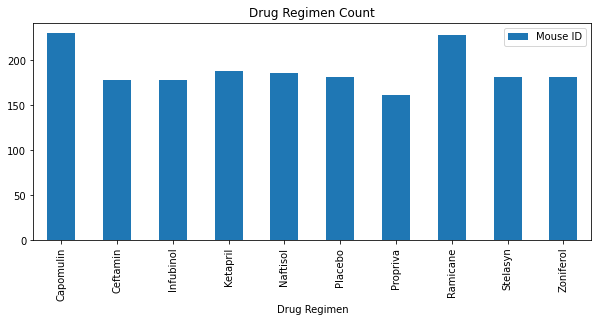

<Figure size 432x288 with 0 Axes>

In [98]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_data_plot = pd.DataFrame(merged_data.groupby(['Drug Regimen']).count()).reset_index()

drugs_and_mouseID = drug_data_plot[['Drug Regimen', 'Mouse ID']]
drugs_and_mouseID = drugs_and_mouseID.set_index('Drug Regimen')

# create the plot
drugs_and_mouseID.plot(kind = 'bar', figsize = (10, 4))

# Set a title for the chart
plt.title('Drug Regimen Count')

plt.show()
plt.tight_layout()

In [99]:
# create a drug regimens list
drug_regimens_list = summary_stats_df.index.tolist()
drug_regimens_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [100]:
# create a list containing counts for each regimen listed above
regimens_count = (merged_data.groupby(['Drug Regimen'])['Age_months'].count()).tolist()
regimens_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

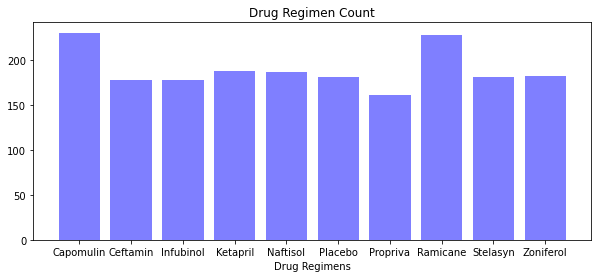

In [101]:
# create bar chart with pyplot 
plt.figure(figsize=(10,4))
plt.bar(drug_regimens_list, regimens_count, color='blue', alpha=0.5, align="center")
plt.title("Drug Regimen Count")
plt.xlabel("Drug Regimens")
plt.show()

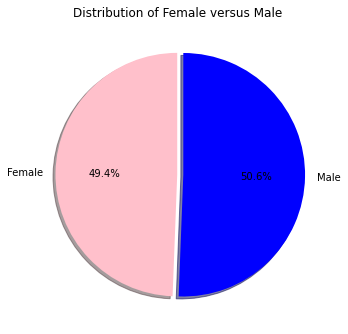

<Figure size 432x288 with 0 Axes>

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_data_plot = pd.DataFrame(merged_data.groupby(['Sex']).count()).reset_index()

gender_and_mouseID = drug_data_plot[['Sex', 'Mouse ID']]

colors = ['pink', 'blue']
explode = (0, 0.05)
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
gender_and_mouseID.plot(kind="pie", explode = explode, y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=90, shadow=True, colors = colors, labels=gender_and_mouseID["Sex"], legend = False)

plt.title("Distribution of Female versus Male")
plt.xlabel("")
plt.ylabel("")

plt.show()
plt.tight_layout()

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# create a list containing counts for each gender
gender_count = (merged_data.groupby(['Sex'])['Age_months'].count()).tolist()
gender_count


[935, 958]

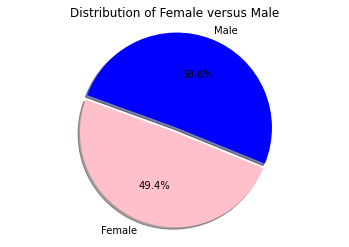

In [104]:
plt.title("Distribution of Female versus Male")
labels = ['Female', 'Male']
explode = (0, 0.05)
colors = ['pink', 'blue']

plt.pie(gender_count, explode=explode, labels=labels,
        autopct="%1.1f%%", shadow=True, colors = colors, startangle=160)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [138]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = merged_data.groupby(["Mouse ID"])["Timepoint"].max()
greatest_timepoint = greatest_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_merged_data = greatest_timepoint.merge(merged_data, on=["Mouse ID", "Timepoint"], how="left")
new_merged_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [106]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vols = new_merged_data.loc[new_merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_vols)
    
    quartiles = tumor_vols.quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # define and determine outliers using upper and lower bounds
    lower = lowerq - (1.5 * iqr)
    upper = upperq + (1.5 * iqr)

    # print out quartiles
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {round((iqr), 2)}")
    print(f'The median of tumor volume is: {quartiles[0.5]}')

    print(f"Values below {round((lower),2)} could be outliers.")
    print(f"Values above {round((upper),2)} could be outliers.")
    print(f"------------------------------------------------") 
    
        

Capomulin IQR data is:
The lower quartile of tumor volume is: 32.38
The upper quartile of tumor volume is: 40.16
The interquartile range of tumor volume is: 7.78
The median of tumor volume is: 38.13
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
------------------------------------------------
Ramicane IQR data is:
The lower quartile of tumor volume is: 31.56
The upper quartile of tumor volume is: 40.66
The interquartile range of tumor volume is: 9.1
The median of tumor volume is: 36.56
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
------------------------------------------------
Infubinol IQR data is:
The lower quartile of tumor volume is: 54.05
The upper quartile of tumor volume is: 65.53
The interquartile range of tumor volume is: 11.48
The median of tumor volume is: 60.17
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
------------------------------------------------
Ceftamin IQR data is:
The low

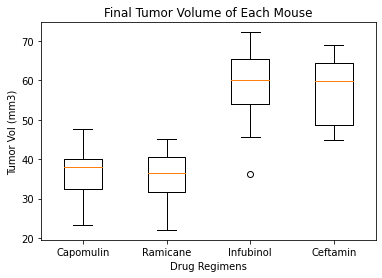

In [107]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse')
ax1.set_ylabel('Tumor Vol (mm3)')
ax1.set_xlabel('Drug Regimens')
ax1.boxplot(tumor_vol_data, labels = treatments)
plt.show()

## Line and Scatter Plots

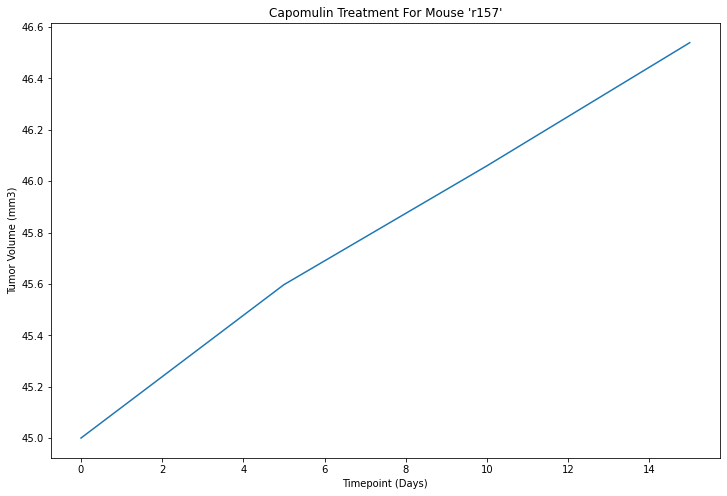

In [108]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = merged_data.loc[merged_data['Drug Regimen'] == 'Capomulin', :]
capomulin_df

# using loc function to select a specific mouse to examine
capomulin_mouse = capomulin_df.loc[capomulin_df['Mouse ID'] == 'r157', :]

# Specify plot parameters
x_axis = capomulin_mouse["Timepoint"]
tumor_volume = capomulin_mouse["Tumor Volume (mm3)"]

# creating plot
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title("Capomulin Treatment For Mouse 'r157'")
plt.plot(x_axis, tumor_volume, label="mm3")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

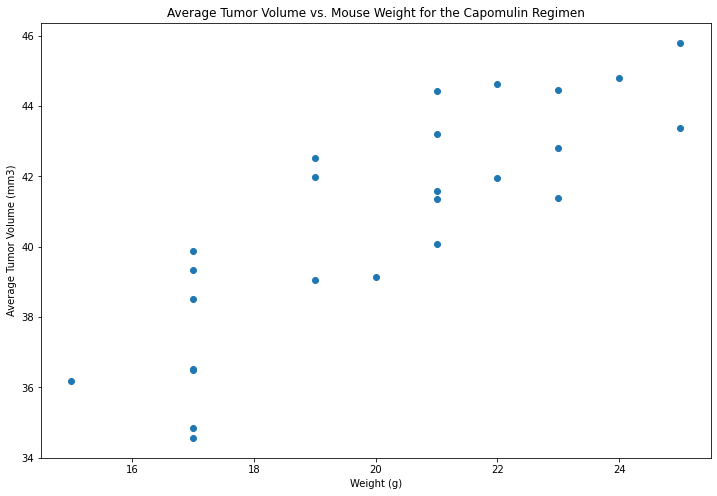

In [109]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_df = capomulin_df.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(avg_df['Weight (g)'],avg_df['Tumor Volume (mm3)'])
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [111]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Compute the Pearson correlation coefficient between "Avg Mouse Weight" and "Average Tumor Volume (mm3)"
correlation = st.pearsonr(avg_df['Weight (g)'],avg_df['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


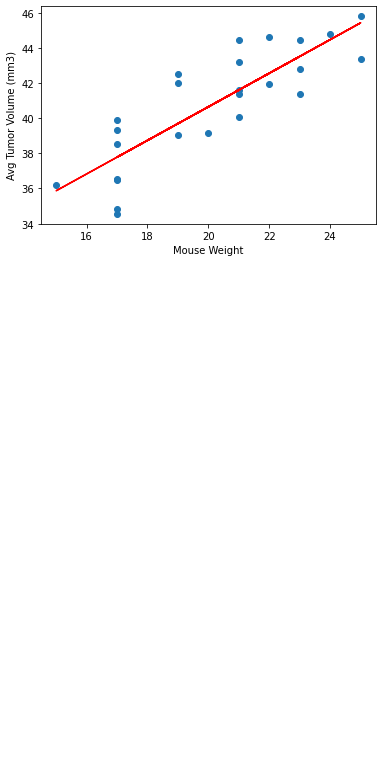

In [136]:
# Add the linear regression equation and line to plot

# define x and y values
x_values = avg_df['Weight (g)']
y_values = avg_df['Tumor Volume (mm3)']

# instantiate our linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y = mx+ b formula
regress_values = slope * x_values + intercept

# this is the text for the line we are graphing
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# draw the graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,3),fontsize=15, color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()